In [76]:
import pandas as pd

video_game_sales = pd.read_csv('vgsales.csv')
college_admissions = pd.read_csv('college_admissions.csv')

In [77]:
video_game_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [78]:
college_admissions

,unique_id,gender,race,gpa,act_score,household_income,decision
0,8002,F,hispanic or latino,3.4310,35.0,136145.29,0
1,1016,F,white,3.1100,30.0,118419.00,0
2,8590,F,black or african american,3.6765,34.0,161223.93,0
3,8090,F,white,3.0700,32.0,71463.00,0
4,787,F,black or african american,2.9925,34.0,48899.97,0
...,...,...,...,...,...,...,...
8353,8876,F,asian,3.7275,NaN,183898.80,1
8354,14442,F,asian,3.6120,31.0,61959.24,0
8355,14338,M,white,3.7400,34.0,171154.00,1
8356,10032,M,asian,3.5700,33.0,105488.12,0


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def standardize_data(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data


/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


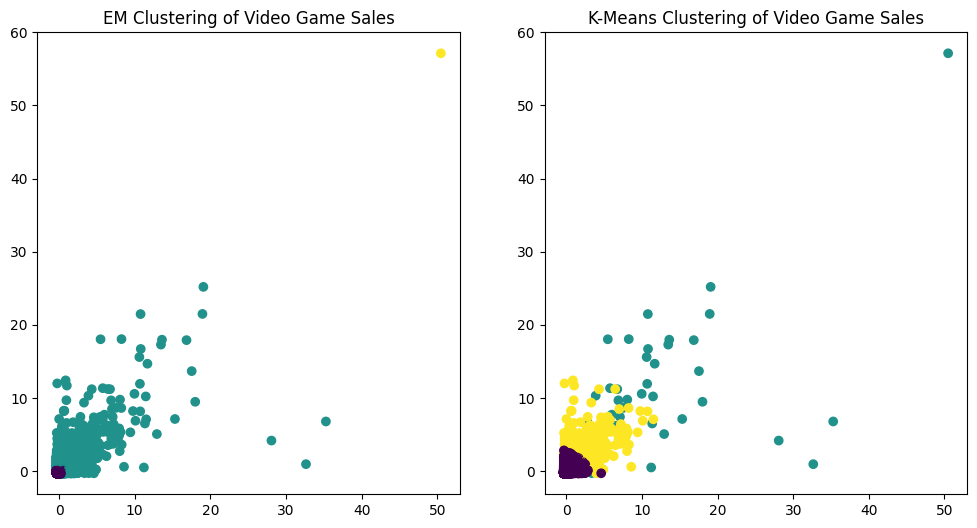

In [80]:
# Select and standardize the features
features_vg = video_game_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
X_vg_scaled = standardize_data(features_vg)

# Apply EM using GMM
gmm = GaussianMixture(n_components=3, random_state=42)
vg_labels_gmm = gmm.fit_predict(X_vg_scaled)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
vg_labels_kmeans = kmeans.fit_predict(X_vg_scaled)

# Plotting results for EM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_vg_scaled[:, 0], X_vg_scaled[:, 1], c=vg_labels_gmm, cmap='viridis')
plt.title('EM Clustering of Video Game Sales')

# Plotting results for K-Means
plt.subplot(1, 2, 2)
plt.scatter(X_vg_scaled[:, 0], X_vg_scaled[:, 1], c=vg_labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering of Video Game Sales')
plt.show()


/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


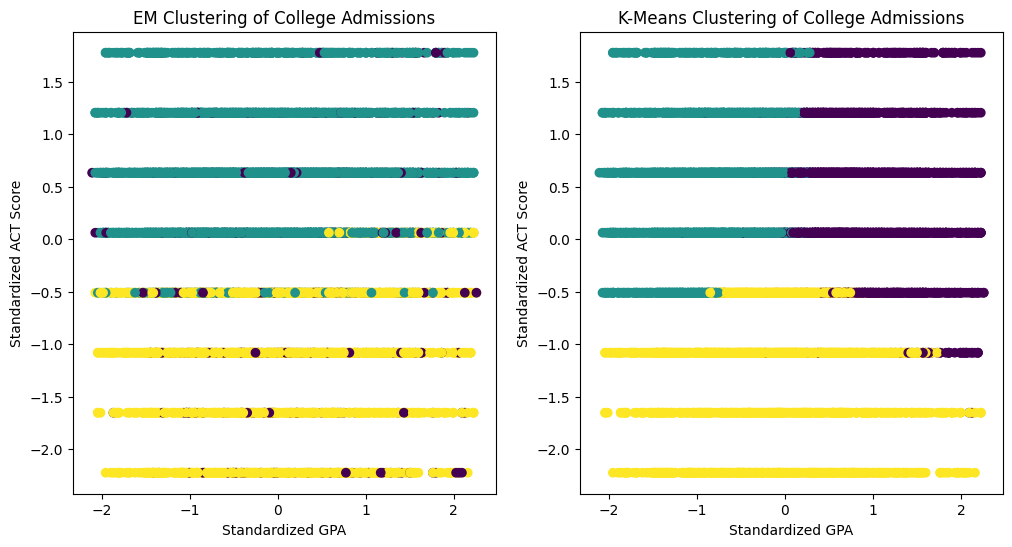

In [39]:
# Handling missing values and selecting features
df_college_admissions = college_admissions.dropna(subset=['gpa', 'act_score', 'household_income'])
features_ca = df_college_admissions[['gpa', 'act_score', 'household_income']]
X_ca_scaled = standardize_data(features_ca)

# Apply EM using GMM
gmm_ca = GaussianMixture(n_components=3, random_state=42)
ca_labels_gmm = gmm_ca.fit_predict(X_ca_scaled)

# Apply K-Means
kmeans_ca = KMeans(n_clusters=3, random_state=42)
ca_labels_kmeans = kmeans_ca.fit_predict(X_ca_scaled)

# Plotting results for EM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_ca_scaled[:, 0], X_ca_scaled[:, 1], c=ca_labels_gmm, cmap='viridis')
plt.xlabel('Standardized GPA')
plt.ylabel('Standardized ACT Score')
plt.title('EM Clustering of College Admissions')

# Plotting results for K-Means
plt.subplot(1, 2, 2)
plt.scatter(X_ca_scaled[:, 0], X_ca_scaled[:, 1], c=ca_labels_kmeans, cmap='viridis')
plt.xlabel('Standardized GPA')
plt.ylabel('Standardized ACT Score')
plt.title('K-Means Clustering of College Admissions')
plt.show()


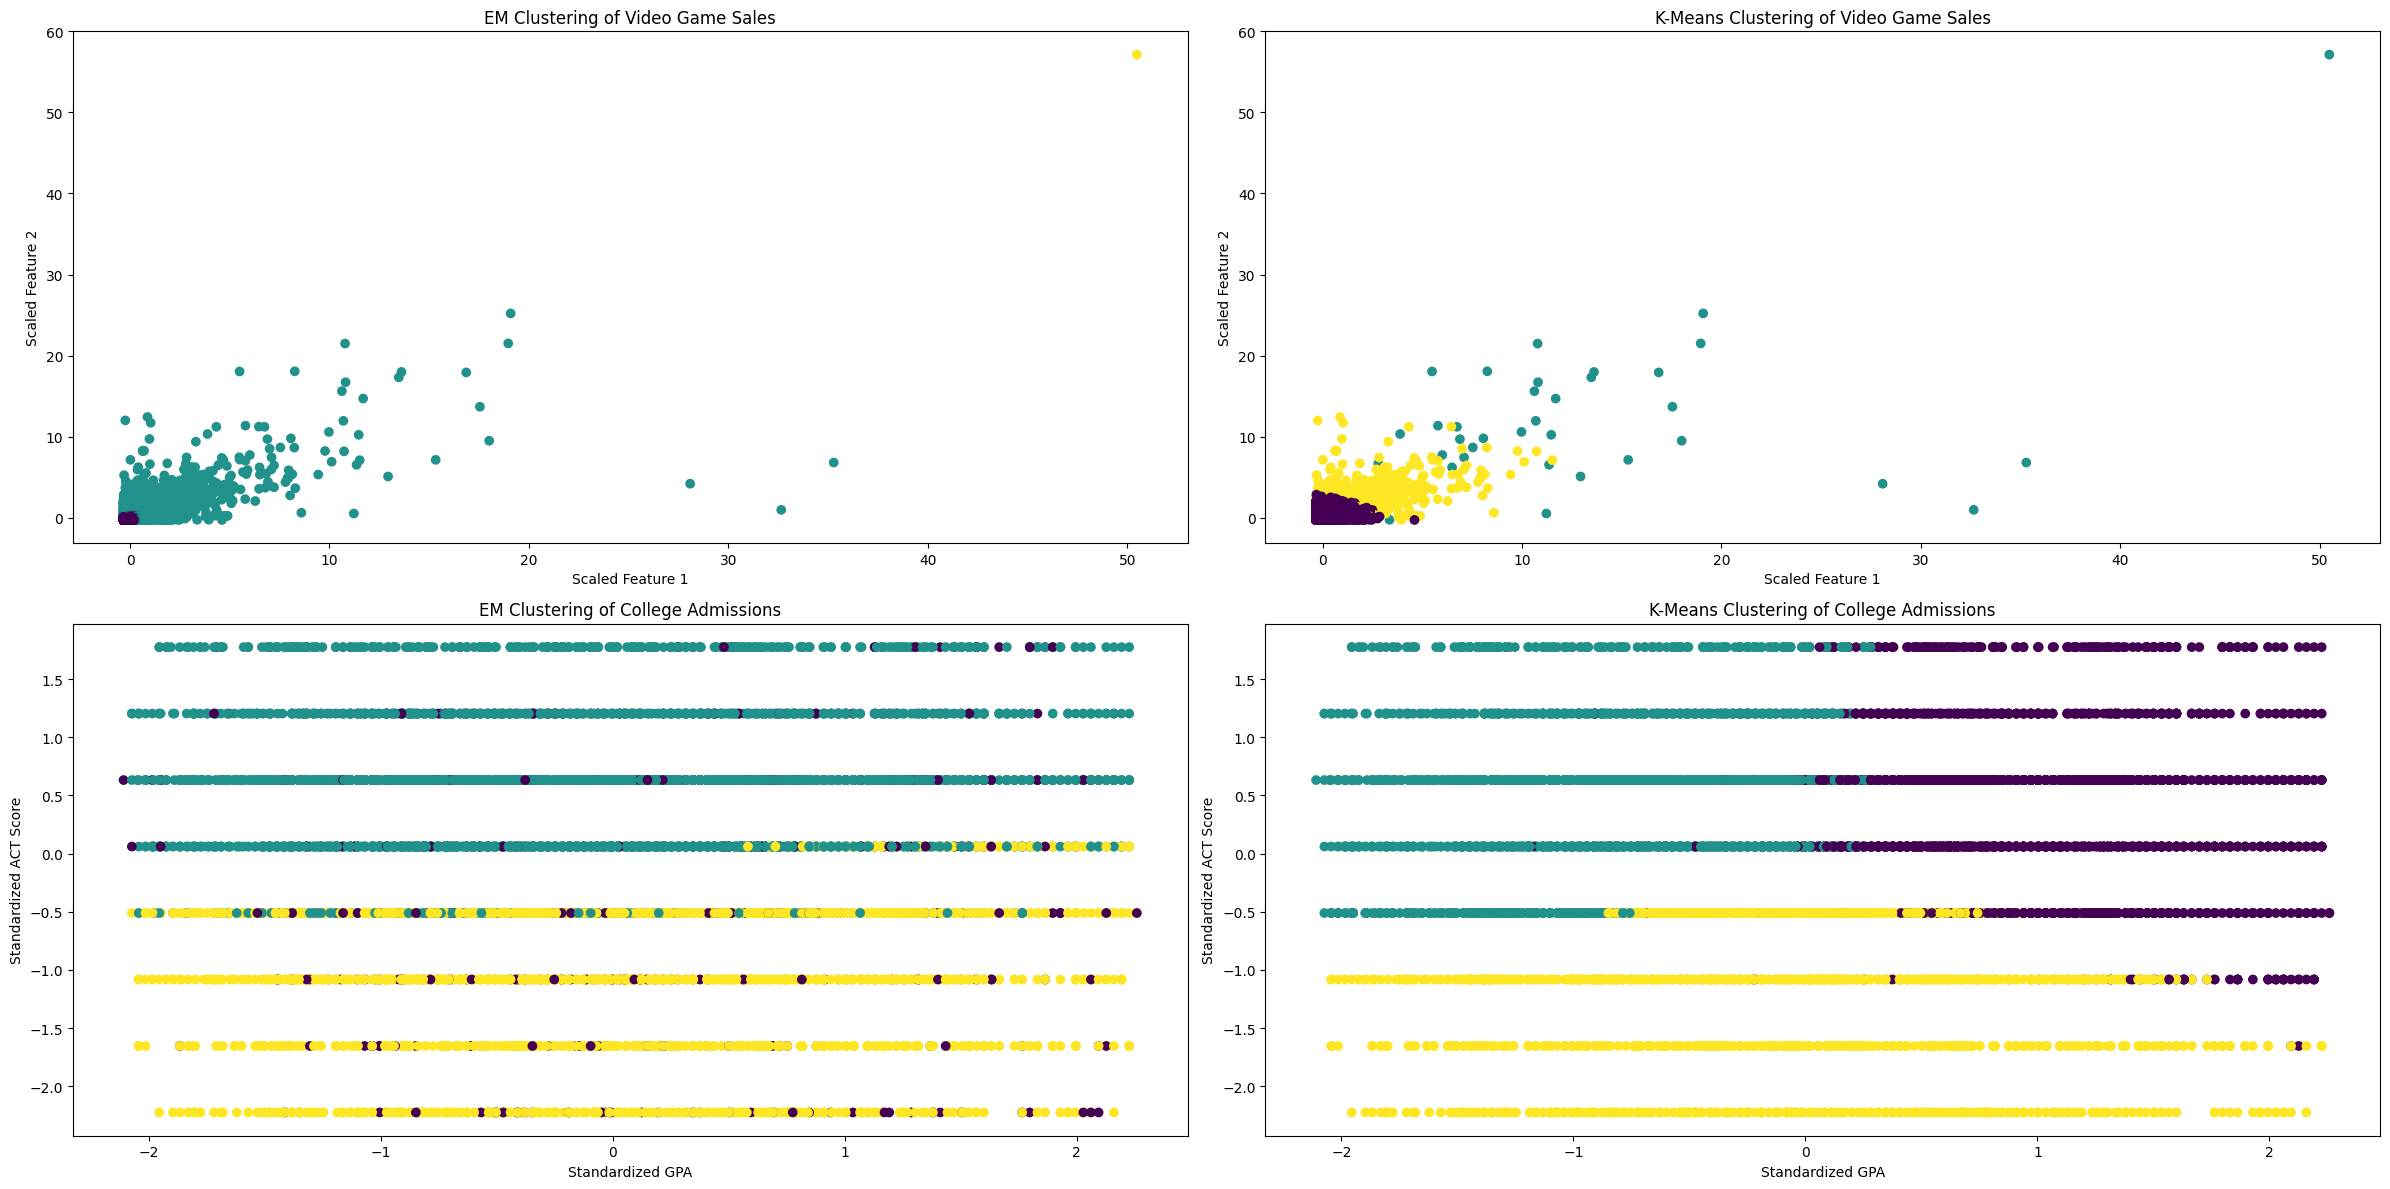

In [81]:
plt.figure(figsize=(24, 12))

# EM Clustering of Video Game Sales
plt.subplot(2, 2, 1)
plt.scatter(X_vg_scaled[:, 0], X_vg_scaled[:, 1], c=vg_labels_gmm, cmap='viridis')
plt.title('EM Clustering of Video Game Sales')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

# K-Means Clustering of Video Game Sales
plt.subplot(2, 2, 2)
plt.scatter(X_vg_scaled[:, 0], X_vg_scaled[:, 1], c=vg_labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering of Video Game Sales')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')

# EM Clustering of College Admissions
plt.subplot(2, 2, 3)
plt.scatter(X_ca_scaled[:, 0], X_ca_scaled[:, 1], c=ca_labels_gmm, cmap='viridis')
plt.title('EM Clustering of College Admissions')
plt.xlabel('Standardized GPA')
plt.ylabel('Standardized ACT Score')

# K-Means Clustering of College Admissions
plt.subplot(2, 2, 4)
plt.scatter(X_ca_scaled[:, 0], X_ca_scaled[:, 1], c=ca_labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering of College Admissions')
plt.xlabel('Standardized GPA')
plt.ylabel('Standardized ACT Score')

plt.tight_layout()
plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import MDS

# Select numerical features for the video game sales dataset
features_vg = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
vg_data = video_game_sales[features_vg]

# Select numerical features for the college admissions dataset
features_admissions = ['gpa', 'act_score', 'household_income']
admissions_data = college_admissions[features_admissions].dropna()

# Standardize the data
scaler_vg = StandardScaler()
vg_data_scaled = scaler_vg.fit_transform(vg_data)

scaler_admissions = StandardScaler()
admissions_data_scaled = scaler_admissions.fit_transform(admissions_data)

# Apply PCA and ICA directly
pca_vg = PCA(n_components=2).fit_transform(vg_data_scaled)
ica_vg = FastICA(n_components=2, random_state=0).fit_transform(vg_data_scaled)
rp_vg = GaussianRandomProjection(n_components=2, random_state=0).fit_transform(vg_data_scaled)

pca_admissions = PCA(n_components=2).fit_transform(admissions_data_scaled)
ica_admissions = FastICA(n_components=2, random_state=0).fit_transform(admissions_data_scaled)
rp_admissions = GaussianRandomProjection(n_components=2, random_state=0).fit_transform(admissions_data_scaled)



In [83]:
pca_pre_mds_vg = PCA(n_components=2).fit_transform(vg_data_scaled)
pca_pre_mds_admissions = PCA(n_components=2).fit_transform(admissions_data_scaled)


In [84]:
# Apply MDS on the PCA-reduced data
mds_vg = MDS(n_components=2, random_state=0, n_jobs=-1).fit_transform(pca_pre_mds_vg[:2500])
mds_admissions = MDS(n_components=2, random_state=0, n_jobs=-1).fit_transform(pca_pre_mds_admissions[:2500])


/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


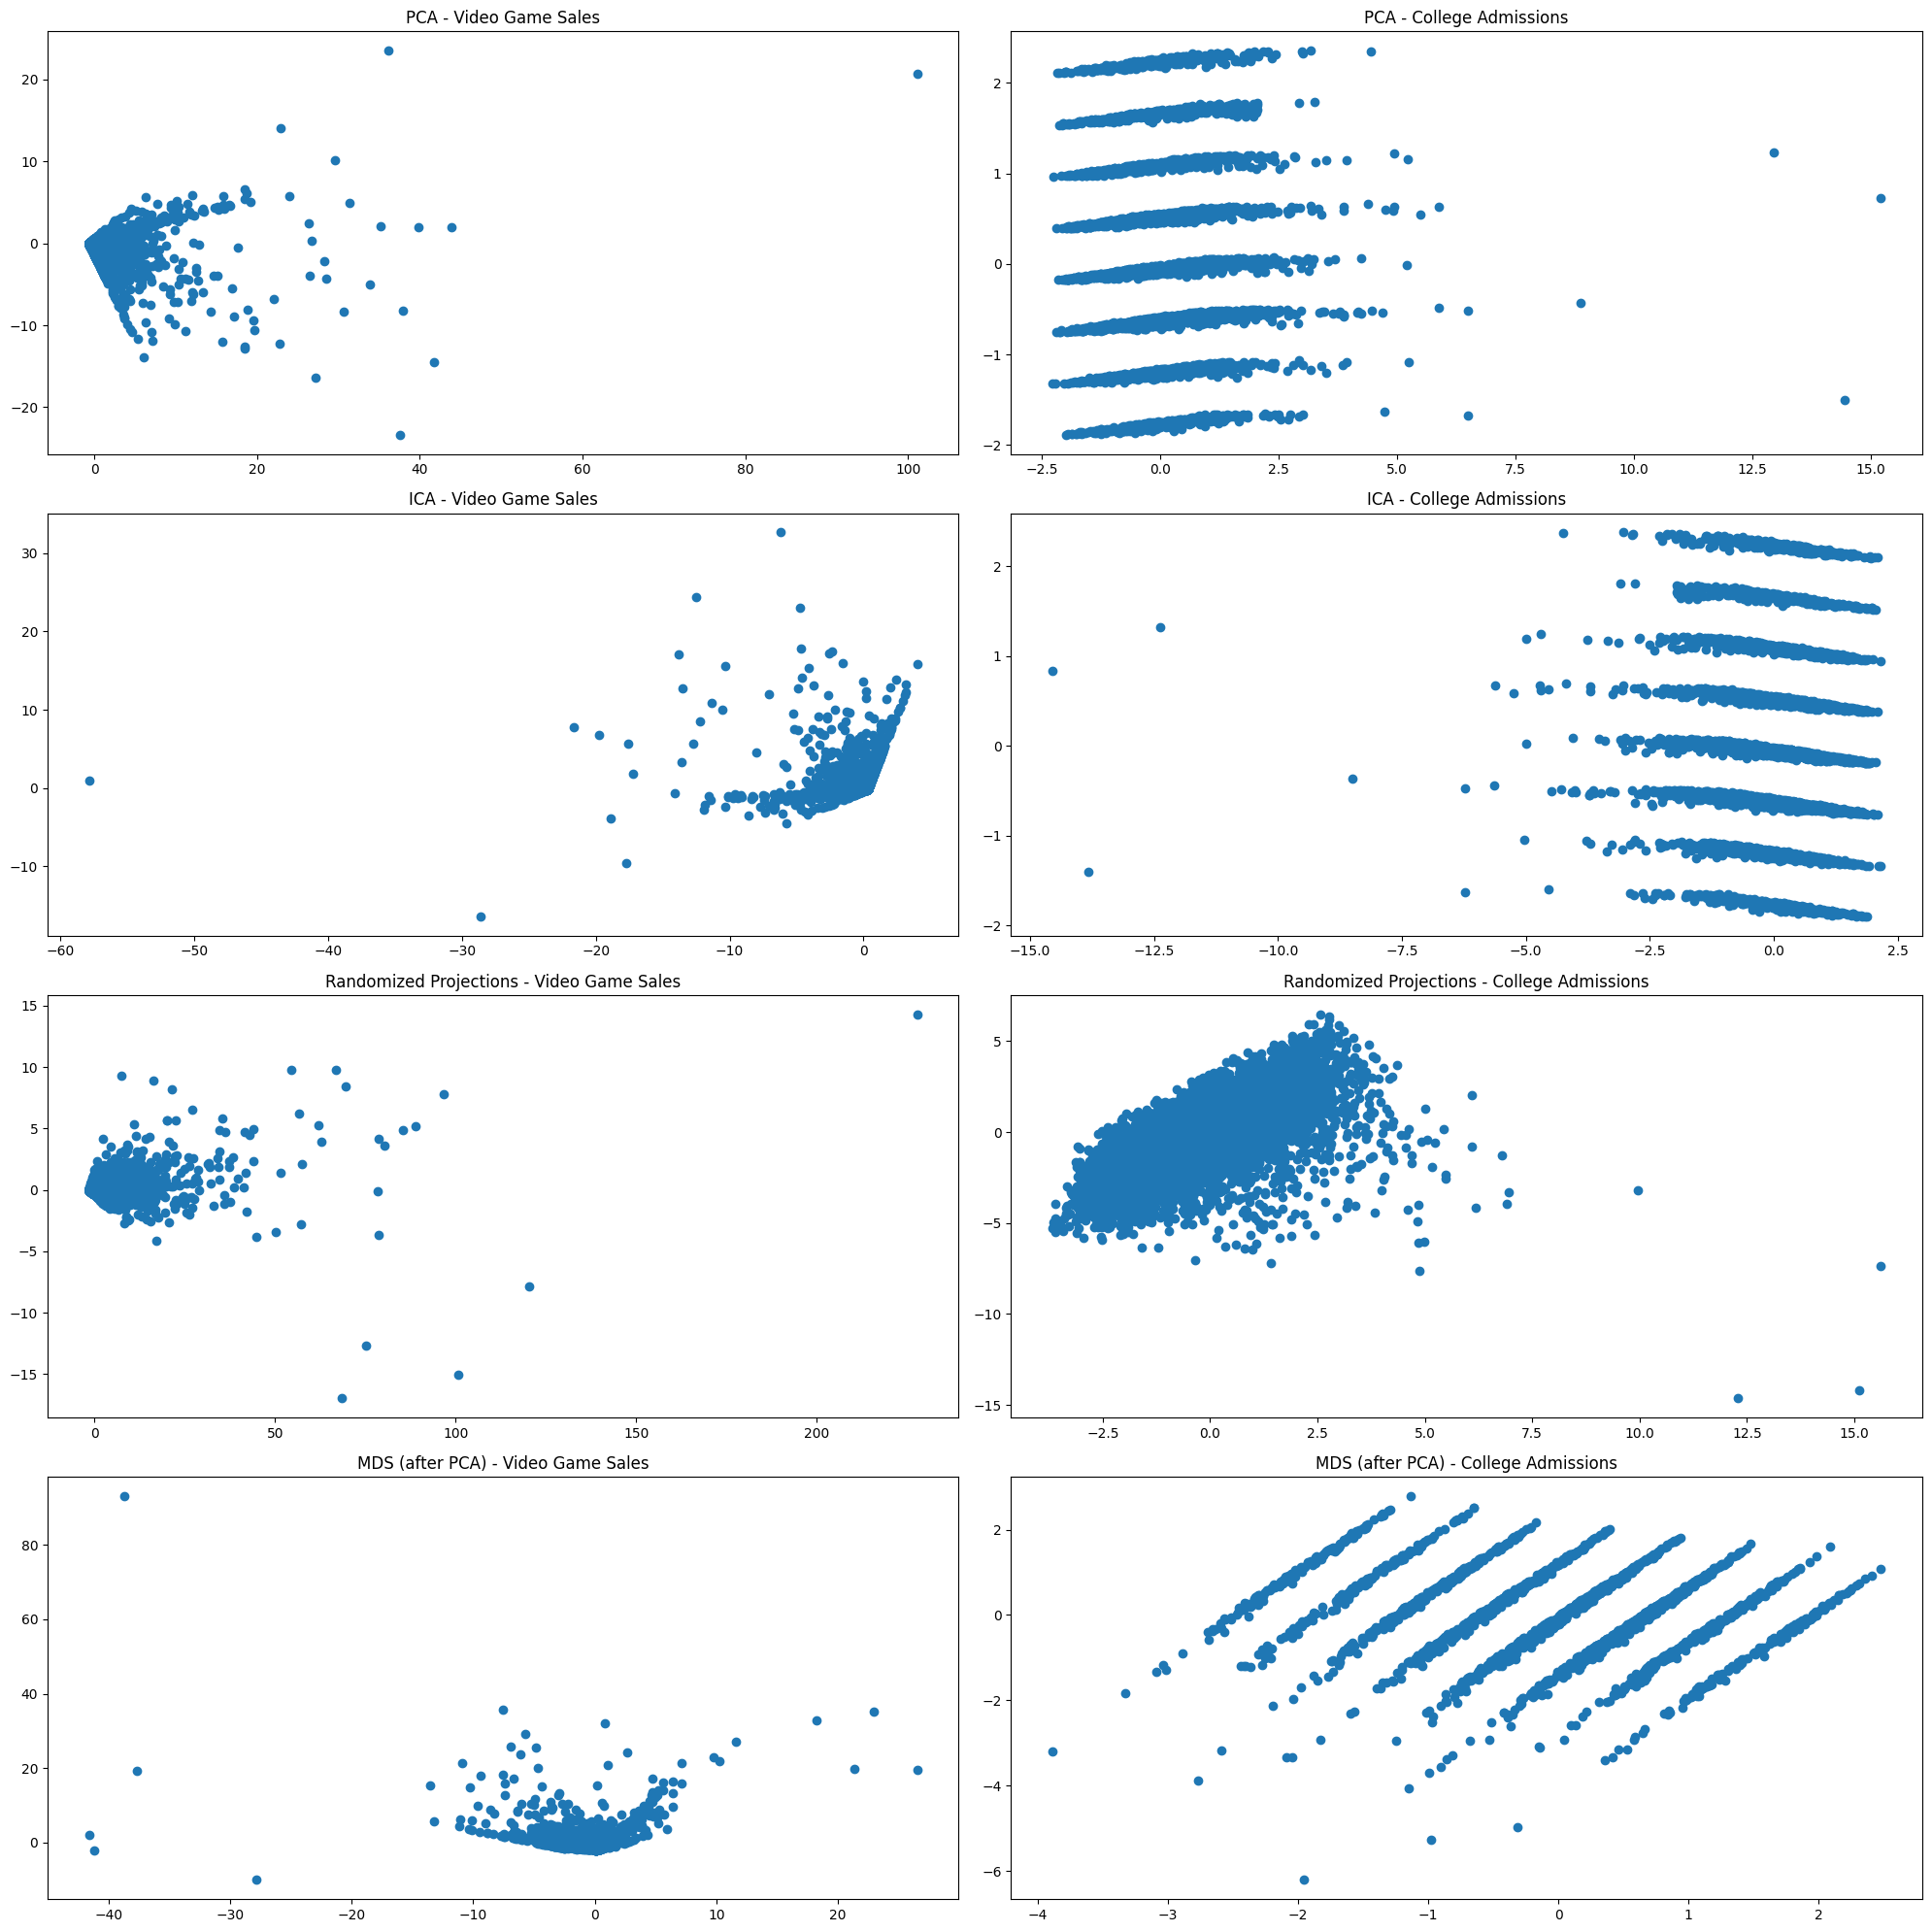

In [85]:
plt.figure(figsize=(20, 20))

# Plot PCA results
plt.subplot(4, 2, 1)
plt.title('PCA - Video Game Sales')
plt.scatter(pca_vg[:, 0], pca_vg[:, 1])
plt.subplot(4, 2, 2)
plt.title('PCA - College Admissions')
plt.scatter(pca_admissions[:, 0], pca_admissions[:, 1])

# Plot ICA results
plt.subplot(4, 2, 3)
plt.title('ICA - Video Game Sales')
plt.scatter(ica_vg[:, 0], ica_vg[:, 1])
plt.subplot(4, 2, 4)
plt.title('ICA - College Admissions')
plt.scatter(ica_admissions[:, 0], ica_admissions[:, 1])

# Plot Randomized Projections results
plt.subplot(4, 2, 5)
plt.title('Randomized Projections - Video Game Sales')
plt.scatter(rp_vg[:, 0], rp_vg[:, 1])
plt.subplot(4, 2, 6)
plt.title('Randomized Projections - College Admissions')
plt.scatter(rp_admissions[:, 0], rp_admissions[:, 1])

# Plot MDS results after PCA reduction
plt.subplot(4, 2, 7)
plt.title('MDS (after PCA) - Video Game Sales')
plt.scatter(mds_vg[:, 0], mds_vg[:, 1])
plt.subplot(4, 2, 8)
plt.title('MDS (after PCA) - College Admissions')
plt.scatter(mds_admissions[:, 0], mds_admissions[:, 1])

plt.tight_layout()
plt.show()

In [50]:
# For the video game sales data
pca_vg = PCA().fit(vg_data_scaled)
eigenvalues_vg = pca_vg.explained_variance_
print("Eigenvalues for Video Game Sales:", eigenvalues_vg)

# For the college admissions data
pca_admissions = PCA().fit(admissions_data_scaled)  
eigenvalues_admissions = pca_admissions.explained_variance_
print("Eigenvalues for College Admissions:", eigenvalues_admissions)

Eigenvalues for Video Game Sales: [3.67710747e+00 7.55725825e-01 3.57333544e-01 2.10126571e-01
 7.85423452e-06]
Eigenvalues for College Admissions: [1.0929668  1.00006178 0.907425  ]


In [51]:
from scipy.stats import kurtosis

# Calculate kurtosis for each ICA component for video game sales
kurtosis_vg = kurtosis(ica_vg, fisher=True)

# Calculate kurtosis for each ICA component for college admissions
kurtosis_admissions = kurtosis(ica_admissions, fisher=True)

print("Kurtosis for each ICA component - Video Game Sales:", kurtosis_vg)
print("Kurtosis for each ICA component - College Admissions:", kurtosis_admissions)


Kurtosis for each ICA component - Video Game Sales: [792.61203111 189.1480473 ]
Kurtosis for each ICA component - College Admissions: [17.85589559 -0.35983463]


In [56]:
# Sort the video_game_sales DataFrame by 'Global_Sales' in descending order
sorted_video_games_sales = video_game_sales.sort_values('Global_Sales', ascending=False)
sorted_video_games_sales[:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [58]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
import numpy as np

def randomized_projection_reconstruction(data, n_components, n_runs):
    errors = []
    for _ in range(n_runs):
        # Create a random projection
        rp = GaussianRandomProjection(n_components=n_components)
        # Project the data
        projected_data = rp.fit_transform(data)
        # Invert the projection
        reconstructed_data = rp.inverse_transform(projected_data)
        # Measure the reconstruction error
        error = mean_squared_error(data, reconstructed_data)
        errors.append(error)
    
    # Calculate average error and standard deviation
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    
    return mean_error, std_error

# Video Games Sales
mean_error, std_error = randomized_projection_reconstruction(rp_vg, n_components=2, n_runs=100)
print(f"Average Reconstruction Error: {mean_error}")
print(f"Standard Deviation of Reconstruction Error: {std_error}")

# College Admissions
mean_error, std_error = randomized_projection_reconstruction(rp_admissions, n_components=2, n_runs=100)
print(f"Average Reconstruction Error: {mean_error}")
print(f"Standard Deviation of Reconstruction Error: {std_error}")


Average Reconstruction Error: 2.4626679626191863e-28
Standard Deviation of Reconstruction Error: 1.947345794997872e-27
Average Reconstruction Error: 3.887688513544208e-29
Standard Deviation of Reconstruction Error: 2.2261477861300962e-28


In [59]:
def projection_with_noise(data, n_components, noise_level, n_runs):
    noisy_errors = []
    for _ in range(n_runs):
        # Add Gaussian noise to the data
        noisy_data = data + np.random.normal(0, noise_level, data.shape)
        # Create a random projection
        rp = GaussianRandomProjection(n_components=n_components)
        # Project the noisy data
        projected_data = rp.fit_transform(noisy_data)
        # Invert the projection
        reconstructed_data = rp.inverse_transform(projected_data)
        # Measure the reconstruction error
        error = mean_squared_error(noisy_data, reconstructed_data)
        noisy_errors.append(error)
    
    # Calculate average error and standard deviation with noise
    mean_noisy_error = np.mean(noisy_errors)
    std_noisy_error = np.std(noisy_errors)
    
    return mean_noisy_error, std_noisy_error

# Video Game Sales
mean_noisy_error, std_noisy_error = projection_with_noise(rp_vg, n_components=2, noise_level=0.1, n_runs=100)
print(f"Average Reconstruction Error with Noise: {mean_noisy_error}")
print(f"Standard Deviation of Reconstruction Error with Noise: {std_noisy_error}")

# College Admissions
mean_noisy_error, std_noisy_error = projection_with_noise(rp_admissions, n_components=2, noise_level=0.1, n_runs=100)
print(f"Average Reconstruction Error with Noise: {mean_noisy_error}")
print(f"Standard Deviation of Reconstruction Error with Noise: {std_noisy_error}")


Average Reconstruction Error with Noise: 2.100846256943837e-29
Standard Deviation of Reconstruction Error with Noise: 1.0144211918822025e-28
Average Reconstruction Error with Noise: 4.837660861820635e-29
Standard Deviation of Reconstruction Error with Noise: 2.9630970585151996e-28


In [61]:
from sklearn.random_projection import GaussianRandomProjection
import numpy as np

def calculate_projection_variation(data, n_components, n_runs):
    projections = []
    
    for _ in range(n_runs):
        # Create and apply randomized projection
        rp = GaussianRandomProjection(n_components=n_components)
        projections.append(rp.fit_transform(data))
    
    # Stack the projections along a new dimension
    stacked_projections = np.stack(projections, axis=-1)
    
    # Calculate the variance across runs for each data point and each component
    variances = np.var(stacked_projections, axis=-1)
    
    average_variances = np.mean(variances, axis=0)
    
    return average_variances

average_variances_vg_sales = calculate_projection_variation(vg_data_scaled, n_components=2, n_runs=100)
average_variances_college_admissions = calculate_projection_variation(admissions_data_scaled, n_components=2, n_runs=100)

print("Average variance of projections across runs for vg sales:", average_variances_vg_sales)
print("Average variance of projections across runs for college admissions:", average_variances_college_admissions)


Average variance of projections across runs for vg sales: [2.0465154  2.51257155]
Average variance of projections across runs for college admissions: [1.4842288  1.57196197]


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant term to your data for VIF computation
vg_data_with_const = add_constant(vg_data_scaled)

# Calculate VIF for each feature
vif_scores = [variance_inflation_factor(vg_data_with_const, i) for i in range(vg_data_with_const.shape[1])]
vif_scores

[1.0000000000000004,
 24462.448034455774,
 9369.698437975743,
 3509.058495381916,
 1305.5729922912572,
 88689.90152972048]

In [65]:
admissions_data_with_const = add_constant(admissions_data_scaled)

# Calculate VIF for each feature
vif_scores = [variance_inflation_factor(admissions_data_with_const, i) for i in range(admissions_data_with_const.shape[1])]
vif_scores

[1.0, 1.0086525405735547, 1.0000251095824133, 1.008677033154067]

In [66]:
from collections import Counter

In [72]:
Counter(college_admissions['race'])

Counter({'white': 3507,
         'asian': 2171,
         'hispanic or latino': 1632,
         'black or african american': 1002,
         'american indian or alaskan native': 34,
         'native hawaiian or other pacific islander': 12})

In [86]:
pca_vg

array([[ 1.01129597e+02,  2.07248505e+01],
       [ 4.17550072e+01, -1.45491275e+01],
       [ 4.39370520e+01,  1.95888983e+00],
       ...,
       [-6.55495567e-01,  4.81478352e-02],
       [-6.46058147e-01,  5.15926818e-02],
       [-6.49706450e-01,  4.90398373e-02]])

/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureW

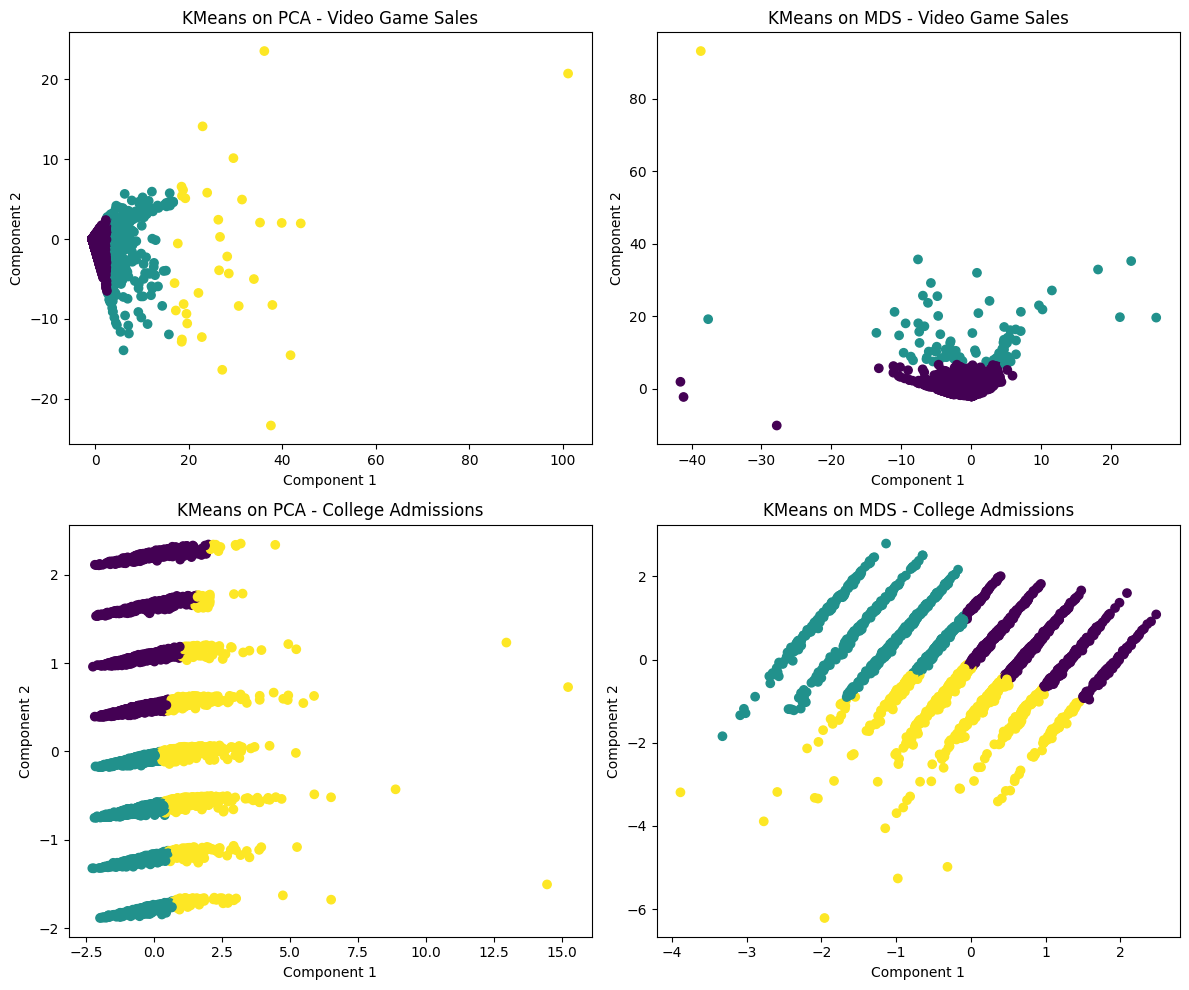

In [88]:
def plot_kmeans_clusters(data, title, subplot_index, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    plt.subplot(2, 2, subplot_index)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

plt.figure(figsize=(12, 10))

# Plot KMeans on PCA-reduced data for video game sales
plot_kmeans_clusters(pca_vg, 'KMeans on PCA - Video Game Sales', 1)

# Plot KMeans on MDS-reduced data for video game sales
plot_kmeans_clusters(mds_vg, 'KMeans on MDS - Video Game Sales', 2)

# Plot KMeans on PCA-reduced data for college admissions
plot_kmeans_clusters(pca_admissions, 'KMeans on PCA - College Admissions', 3)

# Plot KMeans on MDS-reduced data for college admissions
plot_kmeans_clusters(mds_admissions, 'KMeans on MDS - College Admissions', 4)

plt.tight_layout()
plt.show()



/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureW

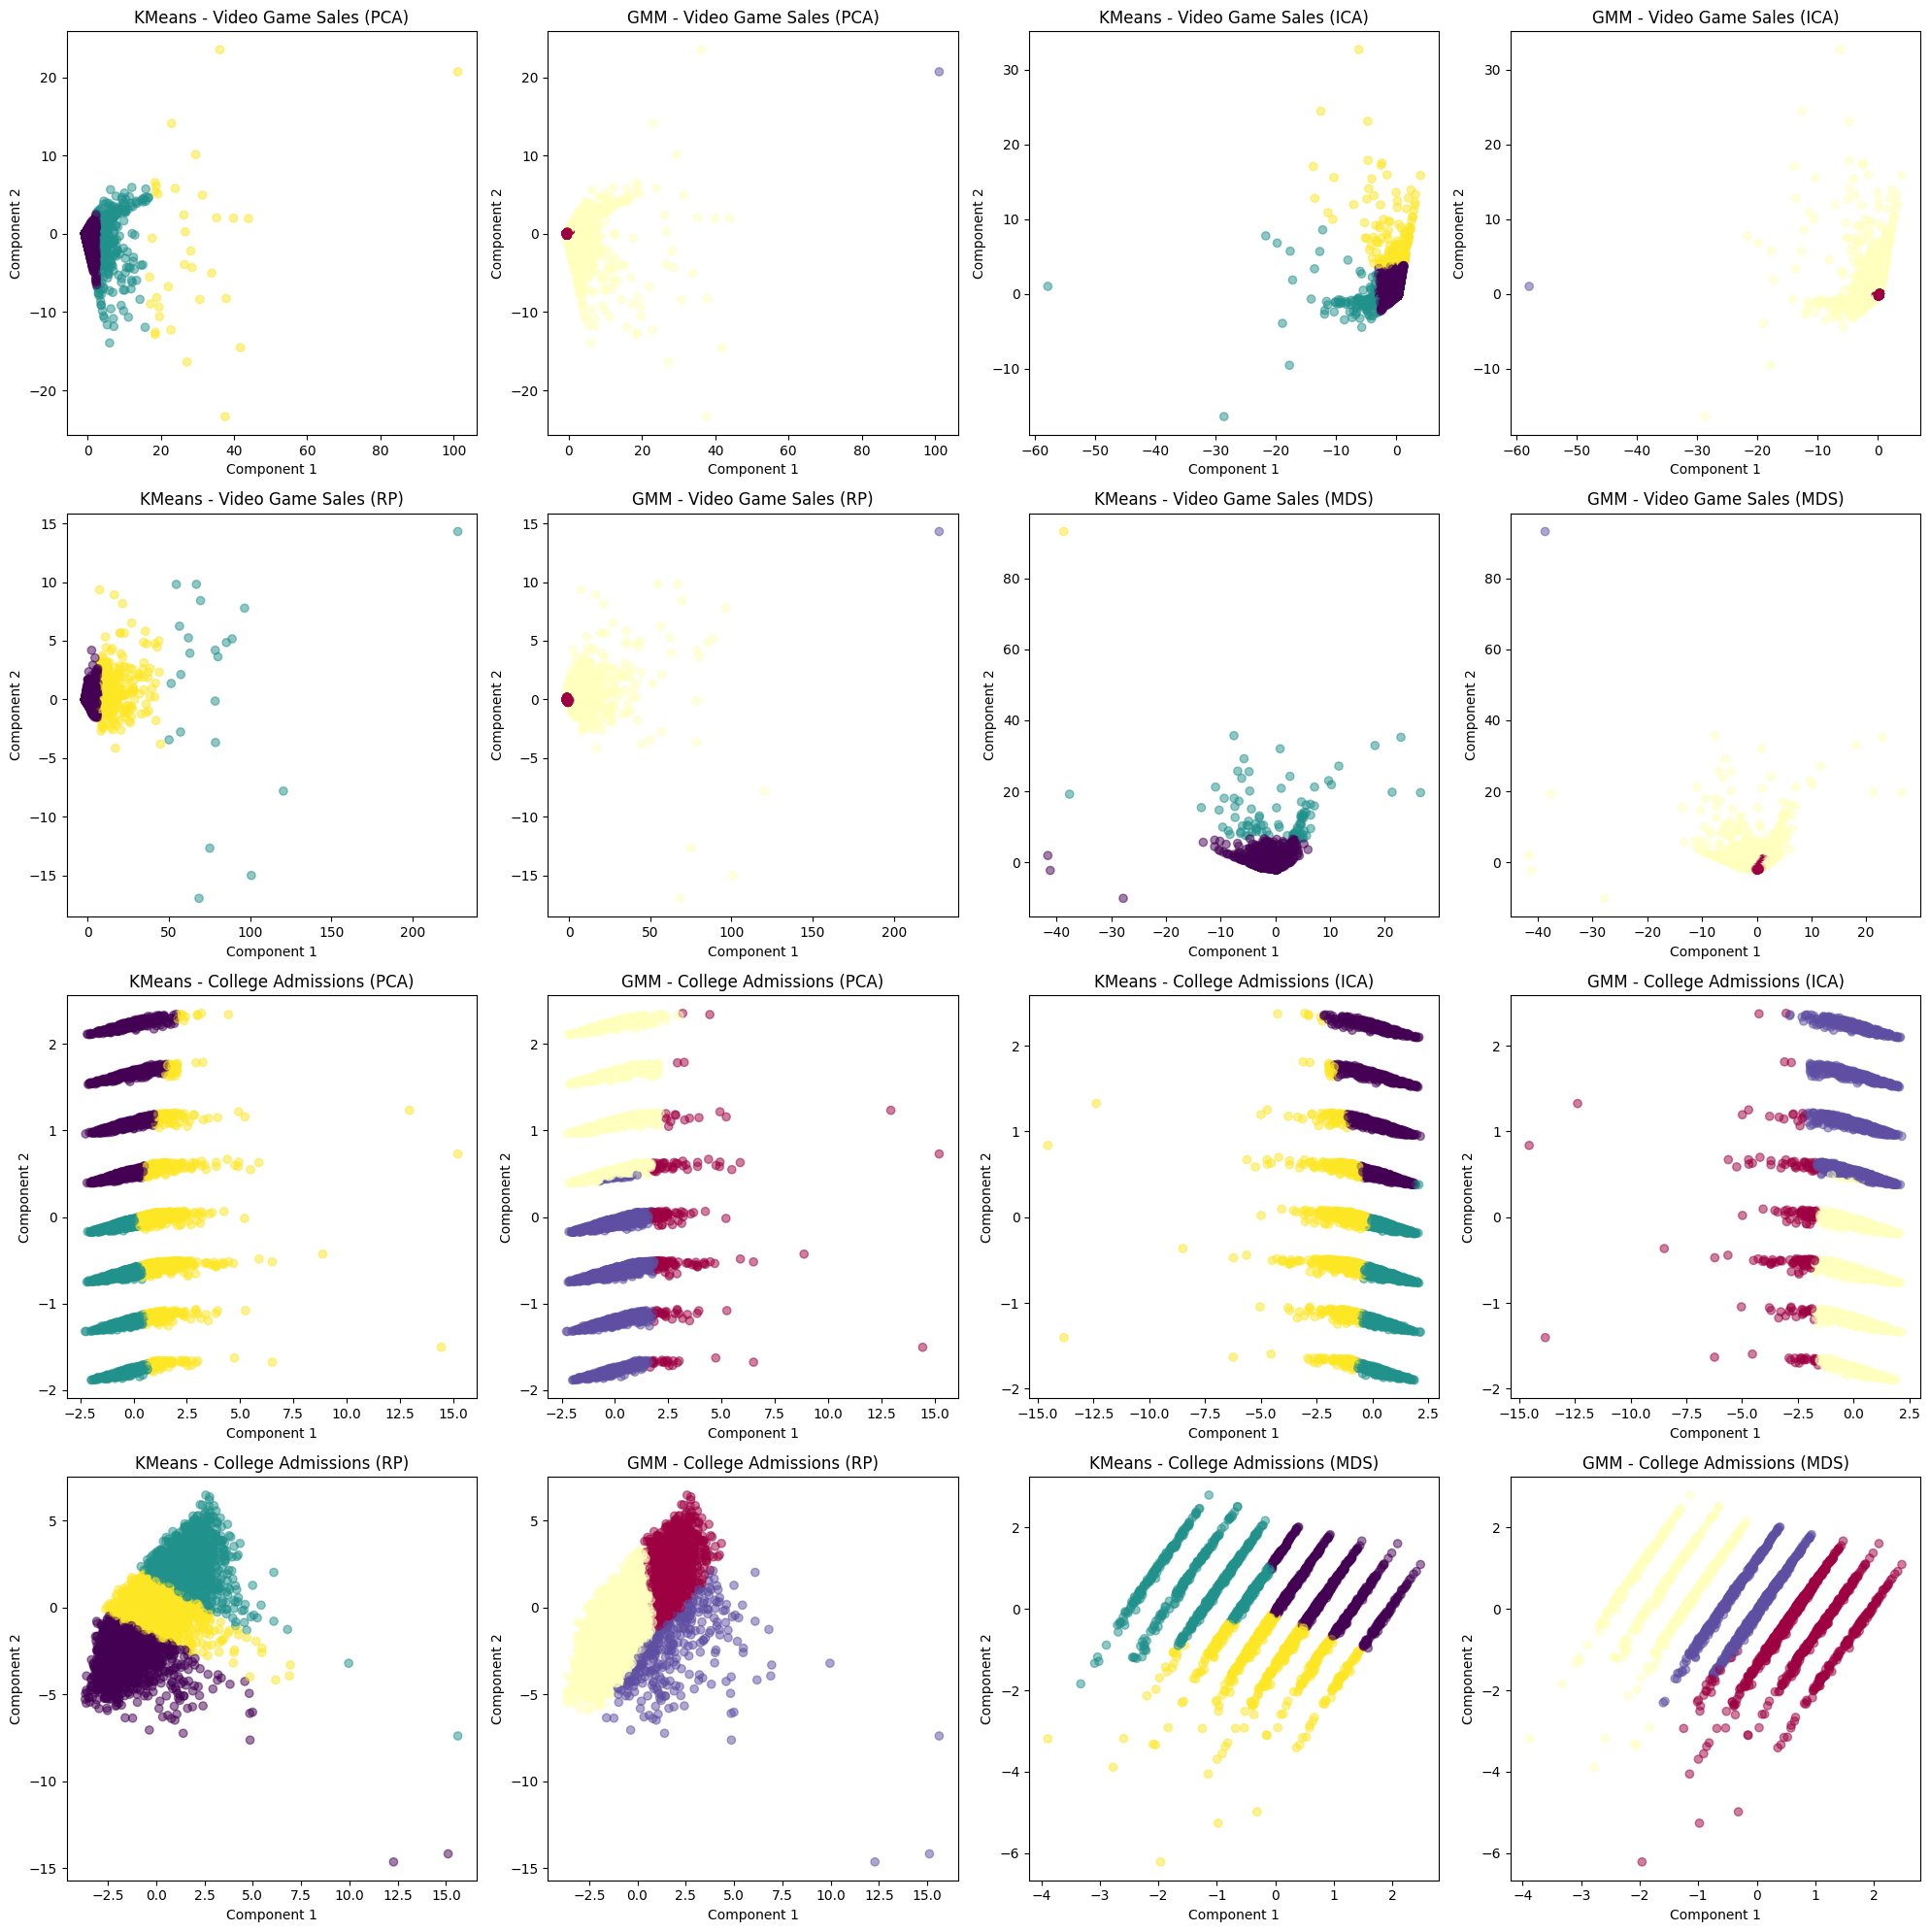

In [90]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

datasets_vg = [pca_vg, ica_vg, rp_vg, mds_vg]
datasets_ca = [pca_admissions, ica_admissions, rp_admissions, mds_admissions]
dataset_names = ['PCA', 'ICA', 'RP', 'MDS']
dataset_labels = ['Video Game Sales', 'College Admissions']

def plot_clusters(data, title, subplot_index):
    # Apply KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels_kmeans = kmeans.fit_predict(data)

    # Apply GMM
    gmm = GaussianMixture(n_components=3, random_state=42)
    labels_gmm = gmm.fit_predict(data)

    # Plotting KMeans results
    plt.subplot(4, 4, subplot_index)
    plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.5)
    plt.title(f'KMeans - {title}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

    # Plotting GMM results
    plt.subplot(4, 4, subplot_index + 1)
    plt.scatter(data[:, 0], data[:, 1], c=labels_gmm, cmap='Spectral', alpha=0.5)
    plt.title(f'GMM - {title}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

plt.figure(figsize=(20, 20))

for i, dataset in enumerate(datasets_vg + datasets_ca):
    # Determine the title based on the dataset and reduction method
    title = f"{dataset_labels[i // 4]} ({dataset_names[i % 4]})"
    # Plot clusters for the current dataset
    plot_clusters(dataset, title, i * 2 + 1)

plt.tight_layout()
plt.show()


In [93]:
vg_data = pd.read_csv('vgsales.csv')
sales_threshold = vg_data['Global_Sales'].median()
vg_data['Success'] = vg_data['Global_Sales'] > sales_threshold
vg_data = vg_data.drop(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales'], axis=1)


In [ ]:
X = vg_data.drop('Success', axis=1)
y = vg_data['Success']

In [94]:
ica_vg

array([[-57.86946993,   0.99757052],
       [-12.52887046,  24.44003281],
       [-21.67694605,   7.75982766],
       ...,
       [  0.28534247,  -0.19622854],
       [  0.27919901,  -0.19770653],
       [  0.28217455,  -0.1958653 ]])

In [95]:
from sklearn.cluster import KMeans

n_clusters = 2

# Apply KMeans to get cluster-based labels for the ICA dataset
kmeans_ica = KMeans(n_clusters=n_clusters, random_state=42)
ica_labels = kmeans_ica.fit_predict(ica_vg)

# Apply KMeans to get cluster-based labels for the MDS dataset
kmeans_mds = KMeans(n_clusters=n_clusters, random_state=42)
mds_labels = kmeans_mds.fit_predict(mds_vg)



/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch 1/10
166/166 - 1s - loss: 0.2223 - accuracy: 0.9911 - val_loss: 0.0244 - val_accuracy: 0.9947 - 1s/epoch - 6ms/step
Epoch 2/10
166/166 - 0s - loss: 0.0173 - accuracy: 0.9968 - val_loss: 0.0093 - val_accuracy: 0.9974 - 296ms/epoch - 2ms/step
Epoch 3/10
166/166 - 0s - loss: 0.0088 - accuracy: 0.9983 - val_loss: 0.0054 - val_accuracy: 0.9992 - 178ms/epoch - 1ms/step
Epoch 4/10
166/166 - 0s - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9996 - 186ms/epoch - 1ms/step
Epoch 5/10
166/166 - 0s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 1.0000 - 195ms/epoch - 1ms/step
Epoch 6/10
166/166 - 0s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0025 - val_accuracy: 1.0000 - 183ms/epoch - 1ms/step
Epoch 7/10
166/166 - 0s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0021 - val_accuracy: 1.0000 - 177ms/epoch - 1ms/step
Epoch 8/10
166/166 - 0s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0019 - val_accuracy: 1.0000 - 205ms/epoch - 1ms/step
Epo

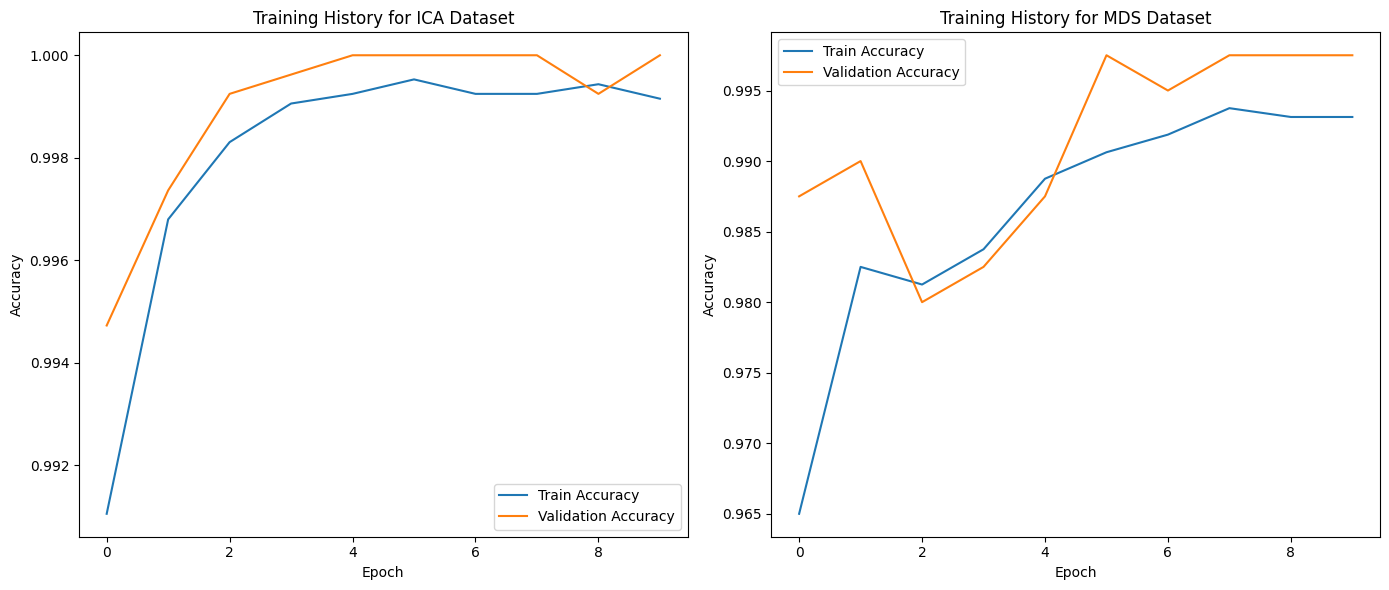

In [97]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Split the ICA and MDS datasets into training and testing sets
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(ica_vg, ica_labels, test_size=0.2)
X_train_mds, X_test_mds, y_train_mds, y_test_mds = train_test_split(mds_vg, mds_labels, test_size=0.2)

# Initialize the model
def create_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def compile_and_train_model(model, X_train, y_train, X_test, y_test, optimizer='adam', epochs=10, batch_size=64):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"Testing Accuracy: {test_accuracy:.2f}")
    return history

# Create, compile, and train models for ICA and MDS datasets
model_ica = create_model(X_train_ica.shape[1])
history_ica = compile_and_train_model(model_ica, X_train_ica, y_train_ica, X_test_ica, y_test_ica)

model_mds = create_model(X_train_mds.shape[1])
history_mds = compile_and_train_model(model_mds, X_train_mds, y_train_mds, X_test_mds, y_test_mds)

plt.figure(figsize=(14, 6))

# Plot training & validation accuracy for the ICA dataset
plt.subplot(1, 2, 1)
plt.plot(history_ica.history['accuracy'], label='Train Accuracy')
plt.plot(history_ica.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History for ICA Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation accuracy for the MDS dataset
plt.subplot(1, 2, 2)
plt.plot(history_mds.history['accuracy'], label='Train Accuracy')
plt.plot(history_mds.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History for MDS Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Epoch 1/10
166/166 - 1s - loss: 0.3008 - accuracy: 0.9329 - val_loss: -3.8897e-02 - val_accuracy: 0.9582 - 900ms/epoch - 5ms/step
Epoch 2/10
166/166 - 0s - loss: 0.0991 - accuracy: 0.9605 - val_loss: -9.7040e-02 - val_accuracy: 0.9672 - 185ms/epoch - 1ms/step
Epoch 3/10
166/166 - 0s - loss: 0.0816 - accuracy: 0.9671 - val_loss: -1.1602e-01 - val_accuracy: 0.9710 - 188ms/epoch - 1ms/step
Epoch 4/10
166/166 - 0s - loss: 0.0671 - accuracy: 0.9736 - val_loss: -1.3605e-01 - val_accuracy: 0.9789 - 187ms/epoch - 1ms/step
Epoch 5/10
166/166 - 0s - loss: 0.0557 - accuracy: 0.9783 - val_loss: -1.6014e-01 - val_accuracy: 0.9816 - 181ms/epoch - 1ms/step
Epoch 6/10
166/166 - 0s - loss: 0.0471 - accuracy: 0.9818 - val_loss: -1.8816e-01 - val_accuracy: 0.9834 - 186ms/epoch - 1ms/step
Epoch 7/10
166/166 - 0s - loss: 0.0402 - accuracy: 0.9852 - val_loss: -2.0807e-01 - val_accuracy: 0.9857 - 185ms/epoch - 1ms/step
Epoch 8/10
166/166 - 0s - loss: 0.0349 - accuracy: 0.9879 - val_loss: -2.4250e-01 - val_ac

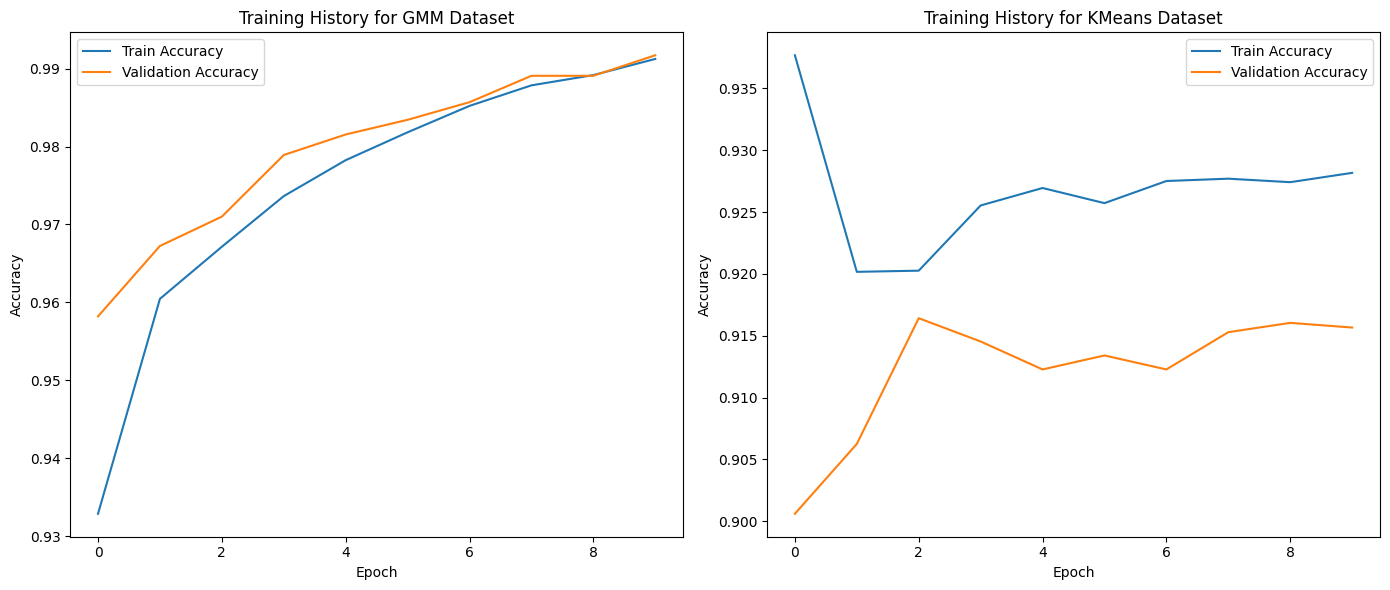

In [99]:
X_train_gmm, X_test_gmm, y_train_gmm, y_test_gmm = train_test_split(X_vg_scaled, vg_labels_gmm, test_size=0.2)
X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(X_vg_scaled, vg_labels_kmeans, test_size=0.2)

# Initialize the model
def create_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Function to compile and train the model
def compile_and_train_model(model, X_train, y_train, X_test, y_test, optimizer='adam', epochs=10, batch_size=64):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"Testing Accuracy: {test_accuracy:.2f}")
    return history

# Create, compile, and train models for gmm and kmeans datasets
model_gmm = create_model(X_train_gmm.shape[1])
history_gmm = compile_and_train_model(model_gmm, X_train_gmm, y_train_gmm, X_test_gmm, y_test_gmm)

model_kmeans = create_model(X_train_kmeans.shape[1])
history_kmeans = compile_and_train_model(model_kmeans, X_train_kmeans, y_train_kmeans, X_test_kmeans, y_test_kmeans)

plt.figure(figsize=(14, 6))

# Plot training & validation accuracy for the gmm dataset
plt.subplot(1, 2, 1)
plt.plot(history_gmm.history['accuracy'], label='Train Accuracy')
plt.plot(history_gmm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History for GMM Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation accuracy for the kmeans dataset
plt.subplot(1, 2, 2)
plt.plot(history_kmeans.history['accuracy'], label='Train Accuracy')
plt.plot(history_kmeans.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History for KMeans Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()